## Analysing Chicago crime dataset using machine learning concepts
## Divya TV

### Our solution statement:¶
### Use the machine learning workflow to process and transform Chicago crime dataset to create a prediction model. This model must predict if a crime will result in an arrest with 70% or greater accuracy

Algorithm choices and their accuracy derived by solution statement.



## Import required packages

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.display import IFrame
from IPython.core.display import display
import os
import time
import seaborn as sns

## We load the saved data from the prepared data file.
## Converting the time to hour of the day after splitting the date column into date and time.

In [ ]:
#df['time_hour'] = pd.to_datetime(df['Time']).dt.hour

df['time_hour'] = pd.to_datetime(df['Time']).dt.strftime('%H:%M:%S')

In [13]:
df['hourofday'] = pd.to_datetime(df['time_hour']).dt.hour

### Machine learning part. Read the data csv and Adding previously dropped X and Y coordinates back.
X and Y coordinates 

In [3]:
def read_crime_data1():
    
    file = os.path.join('../Resources','data_ready_feed_ml.csv')
    crime_df1 = pd.read_csv(file)
    return crime_df1

In [4]:
def read_crime_data2():
    
    file = os.path.join('../Resources','dataset_withXY.csv')
    crime_df2 = pd.read_csv(file)
    return crime_df2

In [5]:
df_cleaned1=read_crime_data1()
df_cleaned2=read_crime_data2()

In [6]:
df_cleaned1['XAxis']=pd.Series(df_cleaned2['X Coordinate'])


In [9]:
df_cleaned1['YAxis']=pd.Series(df_cleaned2['Y Coordinate'])

In [10]:
df_cleaned1.head(2)

,ID,Date,IUCR,CrimeType,Location Description,Arrest,Domestic,Ward,Community Area,FBI Code,...,Police Districts,Police Beats,OnlyDate,Time,time_hour,hourofday,sin_time,cos_time,XAxis,YAxis
0,11859143,10/12/2019 11:58:00 PM,1310,CRIMINAL DAMAGE,APARTMENT,0,0,6.0,67.0,14,...,17.0,216.0,2019-10-12,11:58:00 PM,23:58:00,23,-2.449294e-16,1.0,1168528.0,1858699.0
1,11859039,10/12/2019 11:57:00 PM,2092,NARCOTICS,PARKING LOT/GARAGE(NON.RESID.),1,0,28.0,26.0,18,...,16.0,82.0,2019-10-12,11:57:00 PM,23:57:00,23,-2.449294e-16,1.0,1150216.0,1899724.0


In [11]:
df_cleaned1.shape

(6286967, 29)

## Check the distribution of true and false for Arrests to understand the dataset.

In [14]:
### Check distribution
num_obs = len(df_cleaned1)
num_true = len(df_cleaned1.loc[df_cleaned1['Arrest'] == 1])
num_false = len(df_cleaned1.loc[df_cleaned1['Arrest'] == 0])
print("Number of Arrest cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of No Arrest cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of Arrest cases:  1719183 (27.35%)
Number of No Arrest cases: 4567784 (72.65%)


In [15]:
import numpy as np
hours_in_day=23
df_cleaned1['sin_time']=np.sin(2*np.pi*df_cleaned1.hourofday/hours_in_day)
df_cleaned1['cos_time']=np.cos(2*np.pi*df_cleaned1.hourofday/hours_in_day)

df_cleaned1.head(2)

,ID,Date,IUCR,CrimeType,Location Description,Arrest,Domestic,Ward,Community Area,FBI Code,...,Police Districts,Police Beats,OnlyDate,Time,time_hour,hourofday,sin_time,cos_time,XAxis,YAxis
0,11859143,10/12/2019 11:58:00 PM,1310,CRIMINAL DAMAGE,APARTMENT,0,0,6.0,67.0,14,...,17.0,216.0,2019-10-12,11:58:00 PM,23:58:00,23,-2.449294e-16,1.0,1168528.0,1858699.0
1,11859039,10/12/2019 11:57:00 PM,2092,NARCOTICS,PARKING LOT/GARAGE(NON.RESID.),1,0,28.0,26.0,18,...,16.0,82.0,2019-10-12,11:57:00 PM,23:57:00,23,-2.449294e-16,1.0,1150216.0,1899724.0


### Checking cyclical data - to make sure it looks good.

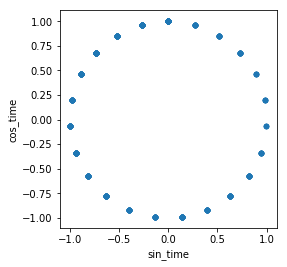

In [19]:
df_cleaned1.sample(500).plot.scatter('sin_time','cos_time').set_aspect('equal')

### Machine learning with random forest, naive bayes, Logistic regression

In [23]:

df_cleaned1['Ward'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [12]:
df_cleaned.head(2)

,ID,Date,IUCR,CrimeType,Location Description,Arrest,Domestic,Ward,Community Area,FBI Code,...,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,OnlyDate,Time,time_hour,hourofday,sin_time,cos_time
0,11859143,10/12/2019 11:58:00 PM,1310,CRIMINAL DAMAGE,APARTMENT,0,0,6.0,67.0,14,...,32.0,23.0,17.0,216.0,2019-10-12,11:58:00 PM,23:58:00,23,-2.449294e-16,1.0
1,11859039,10/12/2019 11:57:00 PM,2092,NARCOTICS,PARKING LOT/GARAGE(NON.RESID.),1,0,28.0,26.0,18,...,23.0,30.0,16.0,82.0,2019-10-12,11:57:00 PM,23:57:00,23,-2.449294e-16,1.0


In [26]:
df_cleaned1.Ward.unique()

array([ 6., 28., 24., 32.,  8., 15., 27., 14., 16., 42.,  1., 34., 13.,
       35., 49.,  2., 10., 44., 36.,  5., 17., 37.,  9.,  3., 18., 33.,
       25.,  4., 46., 22., 48., 21., 20., 23., 47.,  7., 43., 29., 45.,
       38., 26., 19., 50., 12., 11., 41., 31., 40., 30., 39.])

In [27]:
df_cleaned1['IUCR'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [28]:
### Write the file with cleaned data.
export_csv = df_cleaned1.to_csv (r'prepared_data_ready_ML_XY', index = None, header=True)

In [29]:
df_cleaned1.head(2)

,ID,Date,IUCR,CrimeType,Location Description,Arrest,Domestic,Ward,Community Area,FBI Code,...,Police Districts,Police Beats,OnlyDate,Time,time_hour,hourofday,sin_time,cos_time,XAxis,YAxis
0,11859143,10/12/2019 11:58:00 PM,1310,CRIMINAL DAMAGE,APARTMENT,0,0,6.0,67.0,14,...,17.0,216.0,2019-10-12,11:58:00 PM,23:58:00,23,-2.449294e-16,1.0,1168528.0,1858699.0
1,11859039,10/12/2019 11:57:00 PM,2092,NARCOTICS,PARKING LOT/GARAGE(NON.RESID.),1,0,28.0,26.0,18,...,16.0,82.0,2019-10-12,11:57:00 PM,23:57:00,23,-2.449294e-16,1.0,1150216.0,1899724.0


## Read the saved data to be used in machine learning workflow


## Keep in mind out solution statement - "Use the machine learning workflow to process and transform Chicago crime dataset to create a prediction model. This model must predict if a crime will result in an arrest with 70% or greater accuracy¶"

In [3]:
### Load the data that is time ready for machine learning code.
def read_crime_data():
    
    file = os.path.join('../Resources','prepared_data_ready_ML_XY.csv')
    crime_df = pd.read_csv(file)
    return crime_df

In [4]:
df_cleaned=read_crime_data()

In [5]:
df_cleaned.head(3)

,ID,Date,IUCR,CrimeType,Location Description,Arrest,Domestic,Ward,Community Area,FBI Code,...,Police Districts,Police Beats,OnlyDate,Time,time_hour,hourofday,sin_time,cos_time,XAxis,YAxis
0,11859143,10/12/2019 11:58:00 PM,1310,CRIMINAL DAMAGE,APARTMENT,0,0,6.0,67.0,14,...,17.0,216.0,2019-10-12,11:58:00 PM,23:58:00,23,-2.449294e-16,1.0,1168528.0,1858699.0
1,11859039,10/12/2019 11:57:00 PM,2092,NARCOTICS,PARKING LOT/GARAGE(NON.RESID.),1,0,28.0,26.0,18,...,16.0,82.0,2019-10-12,11:57:00 PM,23:57:00,23,-2.449294e-16,1.0,1150216.0,1899724.0
2,11859098,10/12/2019 11:55:00 PM,454,BATTERY,STREET,0,0,24.0,29.0,08B,...,21.0,153.0,2019-10-12,11:55:00 PM,23:55:00,23,-2.449294e-16,1.0,1153327.0,1890804.0


In [ ]:
df_cleaned.sample(500).plot.scatter('sin_time','cos_time').set_aspect('equal')

In [22]:
df_evaluate=df_cleaned.head(500)


In [24]:
export_csv = df_evaluate.to_csv (r'Crime_last500.csv', index = None, header=True)

In [29]:
df_evaluate.head(10)

,ID,Date,IUCR,CrimeType,Location Description,Arrest,Domestic,Ward,Community Area,FBI Code,...,Police Districts,Police Beats,OnlyDate,Time,time_hour,hourofday,sin_time,cos_time,XAxis,YAxis
0,11859143,10/12/2019 11:58:00 PM,1310,CRIMINAL DAMAGE,APARTMENT,0,0,6.0,67.0,14,...,17.0,216.0,2019-10-12,11:58:00 PM,23:58:00,23,-2.449294e-16,1.0,1168528.0,1858699.0
1,11859039,10/12/2019 11:57:00 PM,2092,NARCOTICS,PARKING LOT/GARAGE(NON.RESID.),1,0,28.0,26.0,18,...,16.0,82.0,2019-10-12,11:57:00 PM,23:57:00,23,-2.449294e-16,1.0,1150216.0,1899724.0
2,11859098,10/12/2019 11:55:00 PM,454,BATTERY,STREET,0,0,24.0,29.0,08B,...,21.0,153.0,2019-10-12,11:55:00 PM,23:55:00,23,-2.449294e-16,1.0,1153327.0,1890804.0
3,11859480,10/12/2019 11:49:00 PM,820,THEFT,RESIDENTIAL YARD (FRONT/BACK),0,0,32.0,22.0,06,...,7.0,192.0,2019-10-12,11:49:00 PM,23:49:00,23,-2.449294e-16,1.0,1161813.0,1912993.0
4,11859057,10/12/2019 11:47:00 PM,1320,CRIMINAL DAMAGE,GAS STATION,1,0,8.0,48.0,14,...,19.0,246.0,2019-10-12,11:47:00 PM,23:47:00,23,-2.449294e-16,1.0,1188500.0,1842375.0
5,11859053,10/12/2019 11:45:00 PM,860,THEFT,SMALL RETAIL STORE,0,0,15.0,58.0,06,...,23.0,115.0,2019-10-12,11:45:00 PM,23:45:00,23,-2.449294e-16,1.0,1161164.0,1873304.0
6,11859015,10/12/2019 11:44:00 PM,1822,NARCOTICS,STREET,1,0,27.0,23.0,18,...,16.0,66.0,2019-10-12,11:44:00 PM,23:44:00,23,-2.449294e-16,1.0,1150922.0,1904715.0
7,11859067,10/12/2019 11:43:00 PM,1360,CRIMINAL TRESPASS,STREET,1,0,14.0,63.0,26,...,23.0,120.0,2019-10-12,11:43:00 PM,23:43:00,23,-2.449294e-16,1.0,1160182.0,1869437.0
8,11859028,10/12/2019 11:43:00 PM,502,OTHER OFFENSE,STREET,0,0,16.0,68.0,26,...,17.0,203.0,2019-10-12,11:43:00 PM,23:43:00,23,-2.449294e-16,1.0,1170403.0,1862710.0
9,11859046,10/12/2019 11:40:00 PM,460,BATTERY,OTHER,1,0,42.0,8.0,08B,...,14.0,74.0,2019-10-12,11:40:00 PM,23:40:00,23,-2.449294e-16,1.0,1178582.0,1903456.0


In [25]:
df_cleaned.shape

(6286467, 29)

In [26]:
df_cleaned.drop(df_cleaned.head(500).index,inplace=True)

In [27]:
df_cleaned.shape

(6285967, 29)

In [30]:
export_csv = df_cleaned.to_csv (r'prepared_data_MLXY_500.csv', index = None, header=True)

## Splitting the data for testing and training.

In [2]:
def read_crime_data():
    
    file = os.path.join('../Resources','prepared_data_MLXY_500.csv')
    crime_df = pd.read_csv(file)
    return crime_df

In [3]:
df_cleaned=read_crime_data()

In [11]:
### Splitting data for training and testing

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
feature_col_names = ['IUCR','sin_time' ,'cos_time', 'XAxis', 'YAxis']
predicted_class_names = ['Arrest']

X = df_cleaned[feature_col_names].values     # predictor feature columns (8 X m)
y = df_cleaned[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

In [12]:
##We check to ensure we have the the desired 70% train, 30% test split of the data
print("{0:0.2f}% in training set".format((len(X_train)/len(df_cleaned.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df_cleaned.index)) * 100))

70.00% in training set
30.00% in test set


In [13]:
from sklearn import metrics

## Check % of Arrests in Original, training and testing data.

In [14]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df_cleaned.loc[df_cleaned['Arrest'] == 1]), (len(df_cleaned.loc[df_cleaned['Arrest'] == 1])/len(df_cleaned.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df_cleaned.loc[df_cleaned['Arrest'] == 0]), (len(df_cleaned.loc[df_cleaned['Arrest'] == 0])/len(df_cleaned.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 1718992 (27.35%)
Original False : 4566975 (72.65%)

Training True  : 1202747 (27.33%)
Training False : 3197429 (72.67%)

Test True      : 516245 (27.38%)
Test False     : 1369546 (72.62%)


### Random Forest - algorithm- May the wisdom of the crowd speak

Intuitively, a random forest can be considered as an ensemble of decision trees. The idea behind ensemble learning is to combine weak learners to build a more robust model, a strong learner, that has a better generalization performance.

Another advantage is that the computational cost can be distributed to multiple cores/machines since each tree can grow independently.

We build a random forest by using the RandomForestClassifier in Scikit-learn:

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)      # Create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [16]:
rf_predict_train = rf_model.predict(X_train)
from sklearn import metrics
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9743


In [17]:
rf_predict_test = rf_model.predict(X_test)

# testing metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.8549


In [18]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[1279397   90149]
 [ 183435  332810]]

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.93      0.90   1369546
           1       0.79      0.64      0.71    516245

   micro avg       0.85      0.85      0.85   1885791
   macro avg       0.83      0.79      0.81   1885791
weighted avg       0.85      0.85      0.85   1885791



### Save the trained and tested model into a file.

In [19]:
### save the trained model into a file
from sklearn.externals import joblib

joblib.dump(rf_model, "./chicago-crime-trained-model-RF-removedward.pkl")

['./chicago-crime-trained-model-RF-removedward.pkl']

#### Plotting the tree

In [ ]:
from sklearn.tree import export_graphviz
import os
tree_in_forest=rf_model.estimators_[1]

export_graphviz(tree_in_forest, 
               feature_names=feature_col_names,
               filled=True, 
               rounded=True)

os.system('dot -Tpng tree1.dot -o tree.png')

In [ ]:
from sklearn.tree import export_graphviz
import os
import pydotplus

tree_in_forest=rf_model.estimators_[1]
dot_data = export_graphviz(tree_in_forest,
                                feature_names=feature_col_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

## Naive Bayes: 
## In machine learning, naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. They are among the simplest Bayesian network models

In [20]:
#### Fitting a model
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.6868



In [22]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("nb_predict_test", nb_predict_test)
print ("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

nb_predict_test [0 0 0 ... 0 0 0]
y_test [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
Accuracy: 0.6862


In [23]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[1272029   97517]
 [ 494196   22049]]

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.93      0.81   1369546
           1       0.18      0.04      0.07    516245

   micro avg       0.69      0.69      0.69   1885791
   macro avg       0.45      0.49      0.44   1885791
weighted avg       0.57      0.69      0.61   1885791



### Save the trained and tested model into a file.

In [24]:
from sklearn.externals import joblib

joblib.dump(nb_model, "./chicago-crime-trained-model-NB-NOward.pkl")

['./chicago-crime-trained-model-NB-NOward.pkl']

### Plotting the random forest plot

C:\Users\divya\Anaconda3\envs\pythonData\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\divya\Anaconda3\envs\pythonData\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\divya\Anaconda3\envs\pythonData\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\divya\Anaconda3\envs\pythonData\lib\site-packages\sklearn\model_selection\_validation.

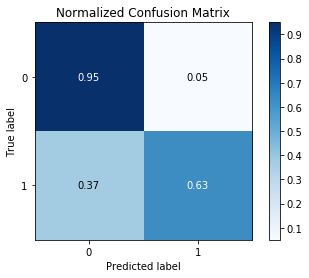

In [26]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(rf_model, X, y)

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y, predictions, normalize=True)

plt.show()